In [116]:
#Importing our libraries
import os
import requests
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import panel as pn
pn.extension('plotly')
import plotly.express as px
from MCForecastTools import MCSimulation

%matplotlib inline

ModuleNotFoundError: No module named 'alpaca_trade_api'

In [64]:
start = dt.datetime(2018,1,1)
end =dt.datetime.now()

## Showing RAW Data - Bitcoin, Ethereum, Solana, Polygon, Cosmos

In [115]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Bitcoin
bitcoin = web.DataReader('BTC-USD', 'yahoo', start, end)
bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-01,452.479004,447.927002,448.484009,451.875000,40660100,451.875000
2016-05-02,452.445007,441.776001,451.933014,444.669006,92127000,444.669006
2016-05-03,451.096985,442.617004,444.726990,450.303986,59366400,450.303986
2016-05-04,450.377991,445.630005,450.183014,446.721985,50407300,446.721985
2016-05-05,448.506012,445.882996,446.710999,447.976013,50440800,447.976013
...,...,...,...,...,...,...
2021-04-28,56227.207031,53887.917969,55036.636719,54824.703125,48000572955,54824.703125
2021-04-29,55115.843750,52418.027344,54858.089844,53555.109375,46088929780,53555.109375
2021-04-30,57900.718750,53129.601562,53568.664062,57750.175781,52395931985,57750.175781


In [66]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Ethereum
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,782.530029,742.004028,755.757019,772.640991,2.595760e+09,772.640991
2018-01-02,914.830017,772.346008,772.346008,884.443970,5.783350e+09,884.443970
2018-01-03,974.471008,868.450989,886.000000,962.719971,5.093160e+09,962.719971
2018-01-04,1045.079956,946.085999,961.713013,980.921997,6.502860e+09,980.921997
2018-01-05,1075.390015,956.325012,975.750000,997.719971,6.683150e+09,997.719971
...,...,...,...,...,...,...
2022-01-20,3265.336914,3000.908203,3095.271729,3001.120117,1.064592e+10,3001.120117
2022-01-21,3029.081055,2496.812988,3002.956787,2557.931641,2.679629e+10,2557.931641
2022-01-22,2615.247314,2330.247314,2561.145264,2405.181152,2.736969e+10,2405.181152


In [67]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Solana
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-10,1.313487,0.694187,0.832005,0.951054,8.736428e+07,0.951054
2020-04-11,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.776819
2020-04-12,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.882507
2020-04-13,0.891603,0.773976,0.890760,0.777832,1.821128e+07,0.777832
2020-04-14,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.661925
...,...,...,...,...,...,...
2022-01-20,143.617401,127.174042,135.791336,127.205284,9.840994e+08,127.205284
2022-01-21,128.432861,107.908997,127.333336,111.966057,3.771688e+09,111.966057
2022-01-22,113.587677,89.287155,111.976540,94.178368,4.039466e+09,94.178368


In [68]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Polygon
polygon = web.DataReader('MATIC-USD', 'yahoo', start, end)
polygon

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-28,0.004545,0.004317,0.004521,0.004421,8.408136e+06,0.004421
2019-04-29,0.004492,0.003471,0.004418,0.003471,8.267044e+06,0.003471
2019-04-30,0.005078,0.003458,0.003462,0.004478,2.507271e+07,0.004478
2019-05-01,0.004673,0.004071,0.004440,0.004374,1.056735e+07,0.004374
2019-05-02,0.004700,0.004096,0.004366,0.004198,6.714908e+06,0.004198
...,...,...,...,...,...,...
2022-01-20,2.188748,1.960077,2.035699,1.960373,8.242024e+08,1.960373
2022-01-21,2.021772,1.658428,1.961334,1.698990,2.195018e+09,1.698990
2022-01-22,1.752779,1.421143,1.699591,1.530623,2.427596e+09,1.530623


In [69]:
#Using our data source, DataReader, to obtain historical daily output for Cosmos
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-14,6.639943,6.353963,6.439715,6.526642,7.318172e+06,6.526642
2019-03-15,7.715249,6.432468,6.633174,7.504351,6.057301e+06,7.504351
2019-03-16,8.305615,6.694531,7.507990,7.383882,3.477393e+06,7.383882
2019-03-17,7.357443,4.727895,7.357443,4.776164,2.653565e+06,4.776164
2019-03-18,5.229982,4.828242,4.828242,5.110341,2.567201e+06,5.110341
...,...,...,...,...,...,...
2022-01-20,42.009510,37.040508,37.124737,39.058186,1.290031e+09,39.058186
2022-01-21,40.768547,32.482494,39.072628,34.417976,2.954829e+09,34.417976
2022-01-22,34.835575,27.749846,34.439507,29.150391,2.165872e+09,29.150391


## Data Cleanup - Obtaining what we need, deleting what we do not. Volume and Closing Price are needed.

In [70]:
#Drop unnecessary columns
bitcoin.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
#Rename columns 
bitcoin = bitcoin.rename(columns={"Adj Close":"Bitcoin"})
bitcoin

,Bitcoin
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000
...,...
2022-01-20,40680.417969
2022-01-21,36457.316406
2022-01-22,35030.250000


In [71]:
bitcoin1 = web.DataReader('BTC-USD', 'yahoo', start, end)
bitcoin1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
bitcoin1 = bitcoin1.rename(columns={"Volume":" BTC Volume"})
bitcoin1

,BTC Volume
Date,
2018-01-01,1.029120e+10
2018-01-02,1.684660e+10
2018-01-03,1.687190e+10
2018-01-04,2.178320e+10
2018-01-05,2.384090e+10
...,...
2022-01-20,2.038203e+10
2022-01-21,4.301199e+10
2022-01-22,3.971439e+10


In [72]:
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
ethereum = ethereum.rename(columns={"Adj Close":"Ethereum"})
ethereum

,Ethereum
Date,
2018-01-01,772.640991
2018-01-02,884.443970
2018-01-03,962.719971
2018-01-04,980.921997
2018-01-05,997.719971
...,...
2022-01-20,3001.120117
2022-01-21,2557.931641
2022-01-22,2405.181152


In [73]:
ethereum1 = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
ethereum1 = ethereum1.rename(columns={"Volume":"ETH Volume"})
ethereum1

,ETH Volume
Date,
2018-01-01,2.595760e+09
2018-01-02,5.783350e+09
2018-01-03,5.093160e+09
2018-01-04,6.502860e+09
2018-01-05,6.683150e+09
...,...
2022-01-20,1.064592e+10
2022-01-21,2.679629e+10
2022-01-22,2.736969e+10


In [74]:
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
solana = solana.rename(columns={"Adj Close":"Solana"})
solana

,Solana
Date,
2020-04-10,0.951054
2020-04-11,0.776819
2020-04-12,0.882507
2020-04-13,0.777832
2020-04-14,0.661925
...,...
2022-01-20,127.205284
2022-01-21,111.966057
2022-01-22,94.178368


In [75]:
solana1 = web.DataReader('SOL-USD', 'yahoo', start, end)
solana1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
solana1 = solana1.rename(columns={"Volume":"SOL Volume"})
solana1

,SOL Volume
Date,
2020-04-10,8.736428e+07
2020-04-11,4.386244e+07
2020-04-12,3.873690e+07
2020-04-13,1.821128e+07
2020-04-14,1.674761e+07
...,...
2022-01-20,9.840994e+08
2022-01-21,3.771688e+09
2022-01-22,4.039466e+09


In [76]:
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
cosmos = cosmos.rename(columns={"Adj Close":"Cosmos"})
cosmos

,Cosmos
Date,
2019-03-14,6.526642
2019-03-15,7.504351
2019-03-16,7.383882
2019-03-17,4.776164
2019-03-18,5.110341
...,...
2022-01-20,39.058186
2022-01-21,34.417976
2022-01-22,29.150391


In [77]:
cosmos1 = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
cosmos1 = cosmos1.rename(columns={"Volume":"ATOM Volume"})
cosmos1

,ATOM Volume
Date,
2019-03-14,7.318172e+06
2019-03-15,6.057301e+06
2019-03-16,3.477393e+06
2019-03-17,2.653565e+06
2019-03-18,2.567201e+06
...,...
2022-01-20,1.290031e+09
2022-01-21,2.954829e+09
2022-01-22,2.165872e+09


In [78]:
polygon = web.DataReader('MATIC-USD', 'yahoo', start, end)
polygon.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
polygon = polygon.rename(columns={"Adj Close":"Polygon"})
polygon

,Polygon
Date,
2019-04-28,0.004421
2019-04-29,0.003471
2019-04-30,0.004478
2019-05-01,0.004374
2019-05-02,0.004198
...,...
2022-01-20,1.960373
2022-01-21,1.698990
2022-01-22,1.530623


In [79]:
polygon1 = web.DataReader('MATIC-USD', 'yahoo', start, end)
polygon1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
polygon1 = polygon1.rename(columns={"Volume":"MATIC Volume"})
polygon1

,MATIC Volume
Date,
2019-04-28,8.408136e+06
2019-04-29,8.267044e+06
2019-04-30,2.507271e+07
2019-05-01,1.056735e+07
2019-05-02,6.714908e+06
...,...
2022-01-20,8.242024e+08
2022-01-21,2.195018e+09
2022-01-22,2.427596e+09


In [80]:
#Combining Price data and converting to percent change. Dropping nulls.
combined_close_df = pd.concat([bitcoin, ethereum, solana, cosmos, polygon], axis='columns', join='inner').pct_change().dropna()
combined_close_df

,Bitcoin,Ethereum,Solana,Cosmos,Polygon
Date,,,,,
2020-04-11,-0.000934,-0.001240,-0.183202,-0.001487,0.012881
2020-04-12,0.016330,0.018496,0.136052,0.012017,0.013210
2020-04-13,-0.018082,-0.030177,-0.118611,-0.030470,-0.027776
2020-04-14,-0.000381,0.008426,-0.149013,0.037750,0.012910
2020-04-15,-0.029276,-0.027345,-0.023075,-0.030297,-0.043664
...,...,...,...,...,...
2022-01-20,-0.025486,-0.030591,-0.063237,0.052348,-0.037135
2022-01-21,-0.103812,-0.147674,-0.119800,-0.118802,-0.133333
2022-01-22,-0.039143,-0.059716,-0.158867,-0.153048,-0.099098


In [81]:
#Combining Volume data and converting to percent change. Dropping nulls.
combined_volume_df= pd.concat([bitcoin1, ethereum1, solana1,cosmos1, polygon1], axis='columns', join='outer').pct_change().dropna()
combined_volume_df

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,MATIC Volume
Date,,,,,
2020-04-11,-0.284272,-0.246141,-0.497936,-0.332518,-0.238687
2020-04-12,0.145329,0.115723,-0.116855,-0.034145,-0.131014
2020-04-13,0.079971,0.088706,-0.529872,0.026039,-0.228244
2020-04-14,-0.116752,-0.105806,-0.080372,0.028916,0.458393
2020-04-15,-0.053418,-0.037451,-0.219275,0.038594,-0.456235
...,...,...,...,...,...
2022-01-20,-0.117338,-0.192722,-0.318804,0.136610,-0.374982
2022-01-21,1.110289,1.517047,2.832630,1.290510,1.663202
2022-01-22,-0.076667,0.021398,0.070997,-0.267006,0.105957


<AxesSubplot:xlabel='Date'>

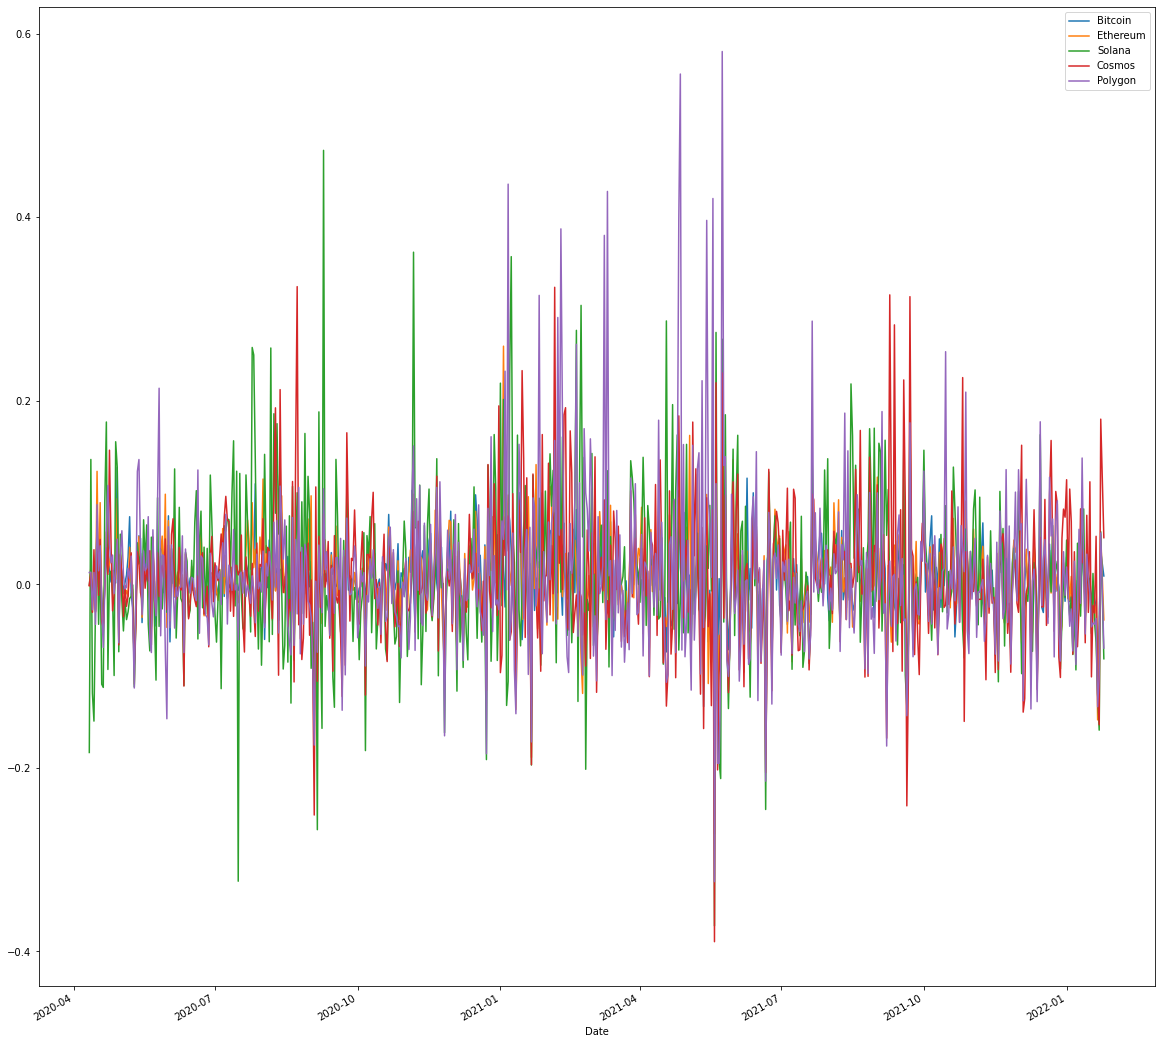

In [82]:
#Plotting percent change to show volatity of price
combined_close_df.plot(figsize=(20,20))

<AxesSubplot:xlabel='Date'>

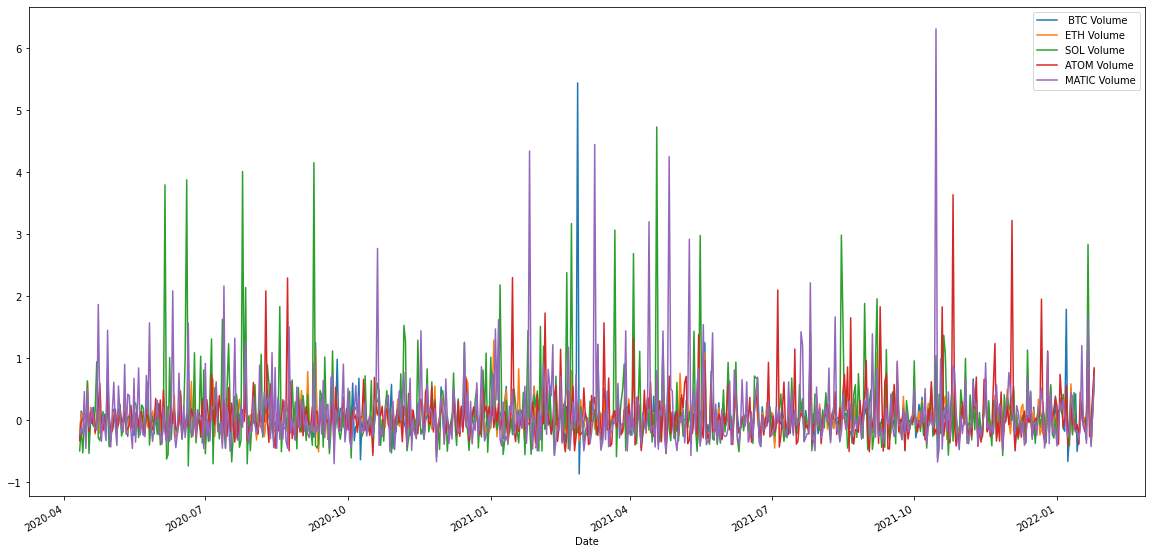

In [83]:
#Plotting percent change to show volatity of volume
combined_volume_df.plot(figsize=(20,10))

In [84]:
combined_close_df.std().dropna()
combined_close_df.tail(10)

,Bitcoin,Ethereum,Solana,Cosmos,Polygon
Date,,,,,
2022-01-15,0.001803,0.006202,0.011235,-0.030603,0.006830
2022-01-16,-0.001471,0.006122,0.000374,0.111723,-0.010142
2022-01-17,-0.020024,-0.041367,-0.053637,-0.100821,-0.046292
2022-01-18,0.002960,-0.015030,0.011872,-0.022823,-0.042094
2022-01-19,-0.014898,-0.021555,-0.040927,-0.031293,-0.043441
2022-01-20,-0.025486,-0.030591,-0.063237,0.052348,-0.037135
2022-01-21,-0.103812,-0.147674,-0.119800,-0.118802,-0.133333
2022-01-22,-0.039143,-0.059716,-0.158867,-0.153048,-0.099098
2022-01-23,0.035585,0.053991,0.057336,0.179979,0.055941


In [85]:
combined_close_df.describe()

,Bitcoin,Ethereum,Solana,Cosmos,Polygon
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.003245,0.005422,0.010683,0.006948,0.010895
std,0.037017,0.049644,0.086755,0.074338,0.087396
min,-0.137661,-0.272003,-0.372088,-0.389349,-0.323903
25%,-0.014837,-0.020099,-0.039052,-0.031436,-0.036473
50%,0.002534,0.005597,0.002107,0.002240,0.003057
75%,0.021171,0.032696,0.052820,0.040270,0.038478
max,0.187465,0.259475,0.472828,0.324360,0.580522


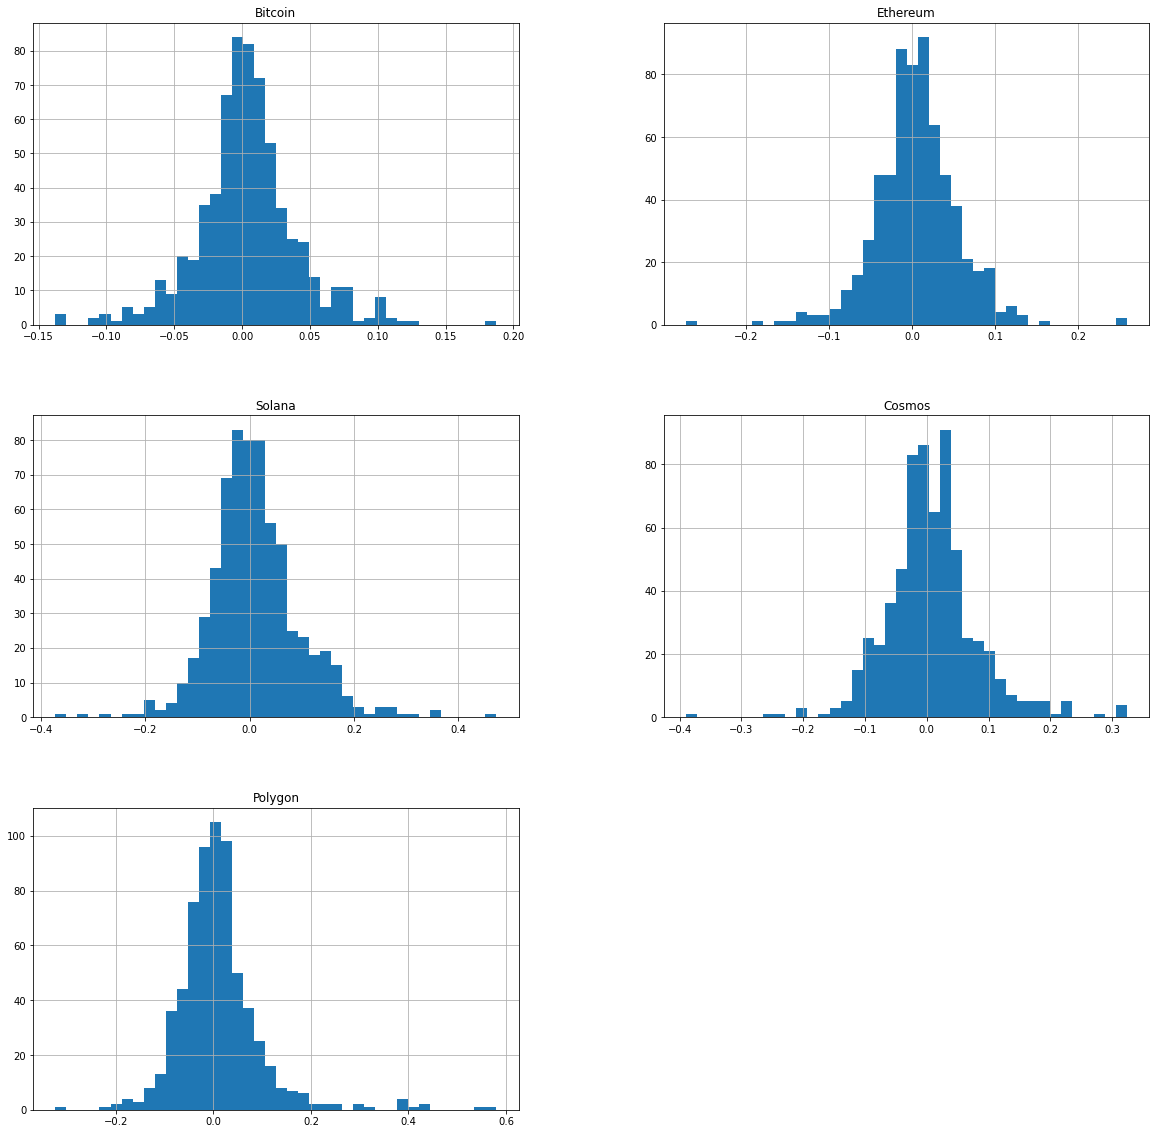

In [86]:
combined_close_df.hist(figsize=(20,20),bins=40);

In [87]:
combined_volume_df.std().dropna()
combined_volume_df.tail(10)

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,MATIC Volume
Date,,,,,
2022-01-15,-0.220807,-0.290715,-0.383604,-0.391217,-0.315891
2022-01-16,-0.025543,-0.011857,0.044142,0.453046,-0.145762
2022-01-17,0.211640,0.298590,0.268505,0.075455,1.201424
2022-01-18,0.033484,0.055074,-0.025768,-0.092709,-0.106817
2022-01-19,0.030081,0.012536,-0.003293,-0.190516,-0.106404
2022-01-20,-0.117338,-0.192722,-0.318804,0.136610,-0.374982
2022-01-21,1.110289,1.517047,2.832630,1.290510,1.663202
2022-01-22,-0.076667,0.021398,0.070997,-0.267006,0.105957
2022-01-23,-0.344873,-0.397820,-0.369176,-0.010192,-0.428432


In [88]:
combined_volume_df.describe()

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,MATIC Volume
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,0.033557,0.027288,0.119941,0.064043,0.110275
std,0.327364,0.249748,0.636293,0.426103,0.619605
min,-0.869188,-0.512922,-0.739352,-0.569453,-0.703844
25%,-0.124447,-0.135494,-0.223571,-0.172460,-0.230038
50%,-0.005287,-0.010913,-0.018800,-0.010242,-0.043419
75%,0.136134,0.127675,0.263926,0.174722,0.261658
max,5.439003,1.517047,4.726495,3.633905,6.310078


array([[<AxesSubplot:title={'center':' BTC Volume'}>,
        <AxesSubplot:title={'center':'ETH Volume'}>],
       [<AxesSubplot:title={'center':'SOL Volume'}>,
        <AxesSubplot:title={'center':'ATOM Volume'}>],
       [<AxesSubplot:title={'center':'MATIC Volume'}>, <AxesSubplot:>]],
      dtype=object)

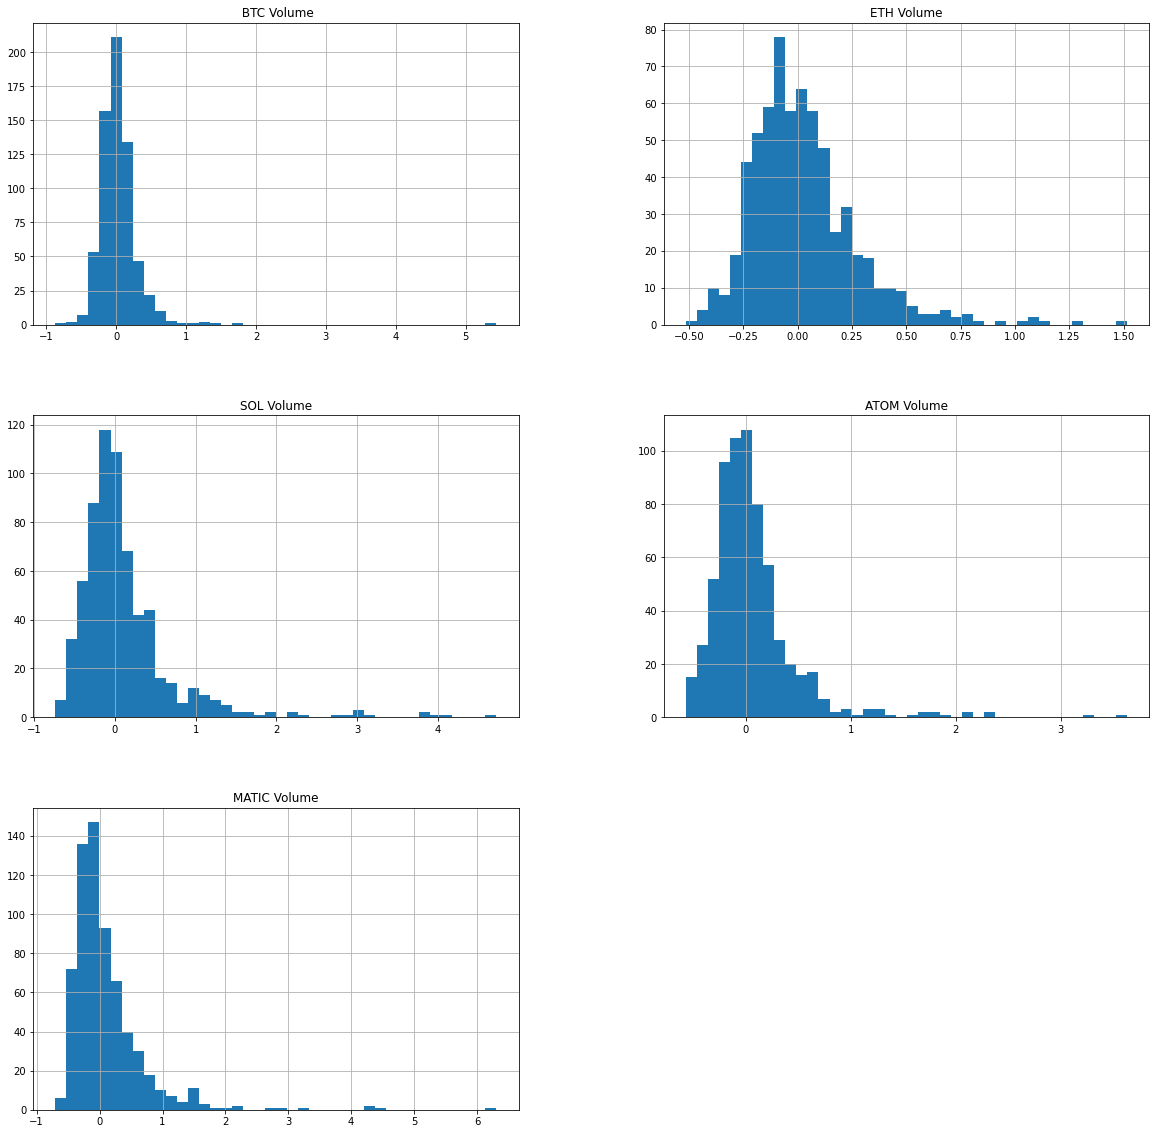

In [89]:
combined_volume_df.hist(figsize=(20,20),bins=40)

In [90]:
#HVPlot shows volality of price and volume
combined_close_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [91]:
combined_volume_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

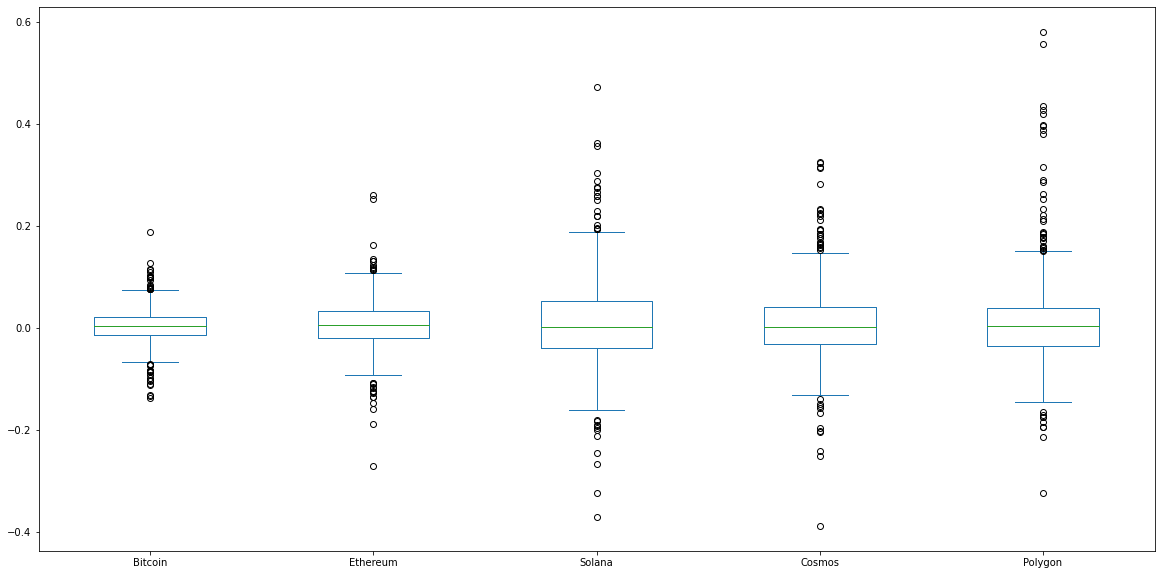

In [92]:
combined_close_df.plot.box(figsize=(20,10))

<AxesSubplot:>

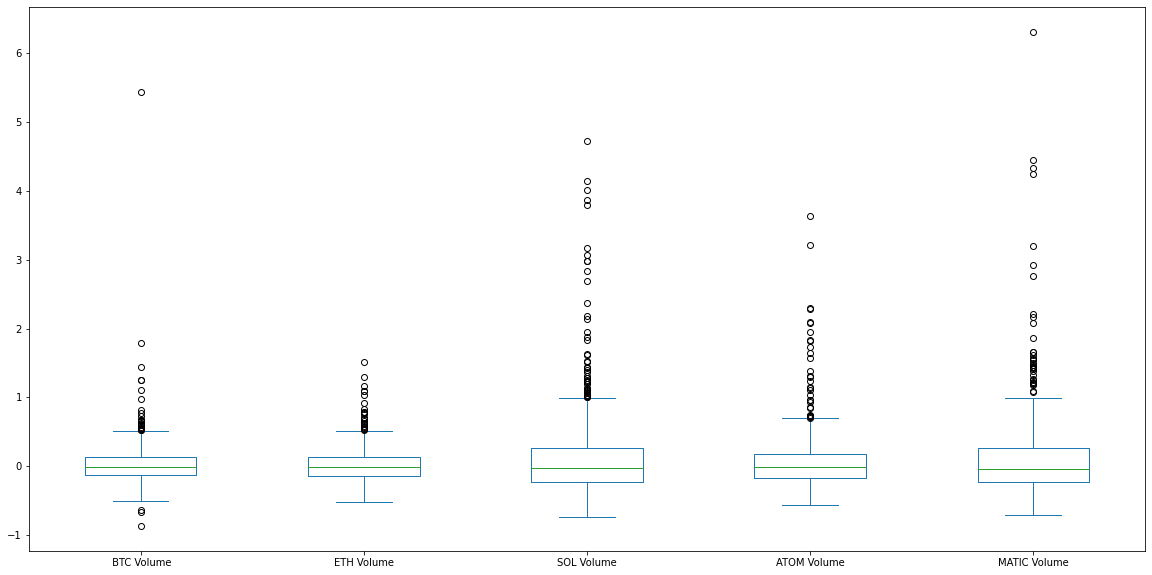

In [93]:
combined_volume_df.plot.box(figsize=(20,10))

In [94]:
combined_close_df.corr()

,Bitcoin,Ethereum,Solana,Cosmos,Polygon
Bitcoin,1.000000,0.757495,0.348297,0.485637,0.497489
Ethereum,0.757495,1.000000,0.484910,0.569125,0.571582
Solana,0.348297,0.484910,1.000000,0.382260,0.383088
Cosmos,0.485637,0.569125,0.382260,1.000000,0.485594
Polygon,0.497489,0.571582,0.383088,0.485594,1.000000


<AxesSubplot:>

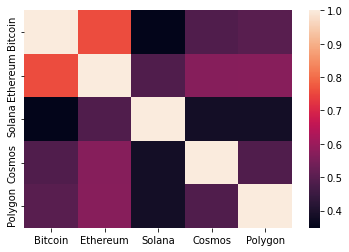

In [95]:
sns.heatmap(combined_close_df.corr())

In [96]:
combined_volume_df.corr()

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,MATIC Volume
BTC Volume,1.000000,0.604997,0.213295,0.262101,0.215942
ETH Volume,0.604997,1.000000,0.339897,0.289351,0.271946
SOL Volume,0.213295,0.339897,1.000000,0.128318,0.151483
ATOM Volume,0.262101,0.289351,0.128318,1.000000,0.165743
MATIC Volume,0.215942,0.271946,0.151483,0.165743,1.000000


<AxesSubplot:>

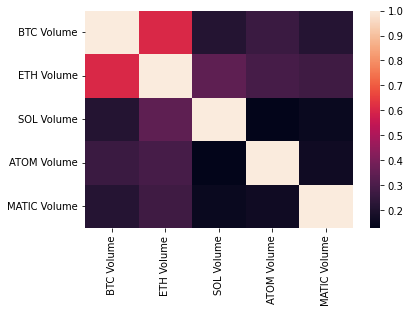

In [97]:
sns.heatmap(combined_volume_df.corr())

In [106]:
#Monte Carlo Simulation is to be run on raw data set
start_date = dt.datetime(2016,1,1)
end_date = dt.datetime(2021,1,1)
tickers = ["BTC-USD", "ETH-USD", "SOL-USD", "MATIC-USD", "ATOM-USD"]


In [110]:
df_stock_data = web.DataReader(
    tickers,
    'yahoo',
    start=start_date,
    end=end_date
)

In [111]:
MC_stock_sim = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252 * 5)

KeyError: 'close'